In [214]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('whitegrid')

In [215]:
data = pd.read_csv('../output/model_data.csv',parse_dates=['ActivityDate'])

data

,Id,ActivityDate,TotalSteps,LogTotalSteps,Day,NoExercise
0,1503960366,2016-03-25,11004,9.306105,4,0
1,1503960366,2016-03-26,17609,9.776222,5,0
2,1503960366,2016-03-27,12736,9.452266,6,0
3,1503960366,2016-03-28,13231,9.490393,0,0
4,1503960366,2016-03-29,12041,9.396156,1,0
...,...,...,...,...,...,...
410,8877689391,2016-04-08,23014,10.043901,4,0
411,8877689391,2016-04-09,16470,9.709357,5,0
412,8877689391,2016-04-10,28497,10.257589,6,0
413,8877689391,2016-04-11,10622,9.270777,0,0


In [216]:
X_normal = data.drop(columns=['Id','ActivityDate','LogTotalSteps','Day','NoExercise']).values
y = data['Day'].values

In [217]:
X_log = data.drop(columns=['Id','ActivityDate','TotalSteps','Day','NoExercise']).values

In [218]:
def simulation(type,X,y):
    '''Dispaly a chart showing the perfromance of the data
    
    Args:
        type (str) : The type of X variable being passed
        X (list): list of intergers
        y (list): list of intergers

    Return:
        int : the K best score
    '''
    k_range = range(1,21)

    cv_scores = []

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        score = cross_val_score(knn,X,y,cv=5)
        cv_scores.append(score.mean())

    k_range_cv_scores = pd.DataFrame({'k_range': k_range,'cv_scores':cv_scores})\
    .sort_values('cv_scores',ascending=False).reset_index(drop=True)

    k_best = k_range_cv_scores.loc[0,'k_range']

    print(f'{type} best K score: {k_best}')

    plt.plot(k_range, cv_scores)
    plt.xticks(range(1,21))
    plt.xlabel('k (neighbors)')
    plt.ylabel('CV Accuracy')
    plt.title('KNN: Choosing k with Cross-Validation')
    plt.grid(True)
    plt.show() 

    return k_best

Normal best K score: 14


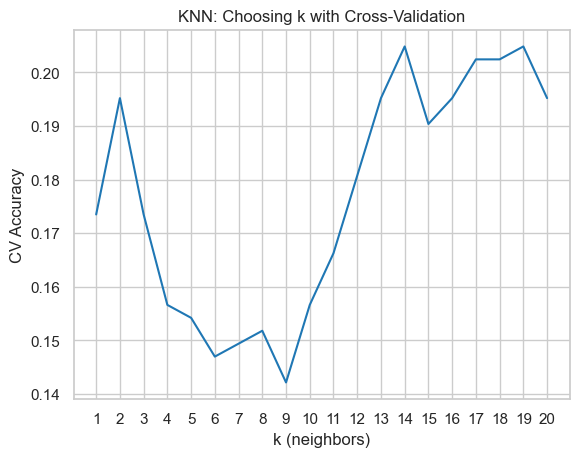

In [219]:
k_best_normal = simulation('Normal',X_normal,y)

Log best K score: 2


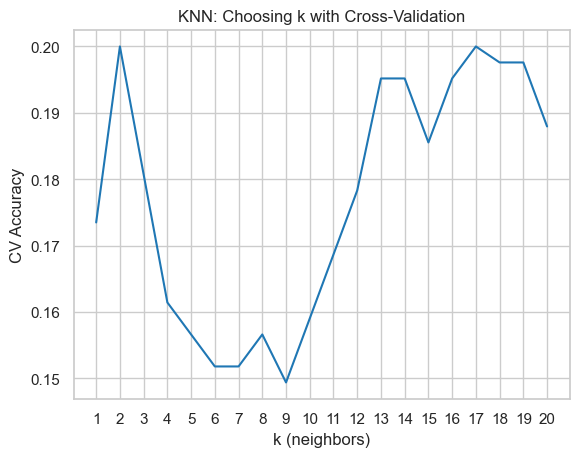

In [220]:
k_best_log = simulation('Log',X_log,y)

In [221]:
def simulated_prediction(X,y,k):

    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)

    print(f'Model score: {knn.score(X_test, y_test)}')
    prediction = knn.predict(X_test)
    print(classification_report(y_test,prediction))

    new = pd.DataFrame(X_test)
    new.columns = ['TotalSteps']
    new['Day'] = y_test
    new['PredictionDay'] = prediction

    return new

In [222]:
normal_new = simulated_prediction(X_normal,y,k_best_normal)
normal_new

Model score: 0.1686746987951807
              precision    recall  f1-score   support

           0       0.17      0.19      0.18        16
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         6
           4       0.20      0.05      0.08        19
           5       0.16      0.42      0.23        12
           6       0.36      0.36      0.36        14

    accuracy                           0.17        83
   macro avg       0.13      0.14      0.12        83
weighted avg       0.16      0.17      0.15        83



,TotalSteps,Day,PredictionDay
0,5316,4,5
1,6406,2,0
2,5400,2,5
3,4979,5,3
4,10146,6,6
...,...,...,...
78,2600,2,0
79,13513,2,3
80,1004,2,1
81,5594,6,5


In [225]:
log_new = simulated_prediction(X_log,y,k_best_log)
log_new

Model score: 0.1927710843373494
              precision    recall  f1-score   support

           0       0.11      0.12      0.11        16
           1       0.09      0.40      0.14         5
           2       0.38      0.55      0.44        11
           3       0.00      0.00      0.00         6
           4       0.45      0.26      0.33        19
           5       0.00      0.00      0.00        12
           6       0.50      0.07      0.12        14

    accuracy                           0.19        83
   macro avg       0.22      0.20      0.17        83
weighted avg       0.26      0.19      0.19        83



,TotalSteps,Day,PredictionDay
0,8.578665,4,4
1,8.765146,2,0
2,8.594339,2,2
3,8.513185,5,1
4,9.224933,6,6
...,...,...,...
78,7.863651,2,6
79,9.511481,2,0
80,6.912743,2,1
81,8.629629,6,1


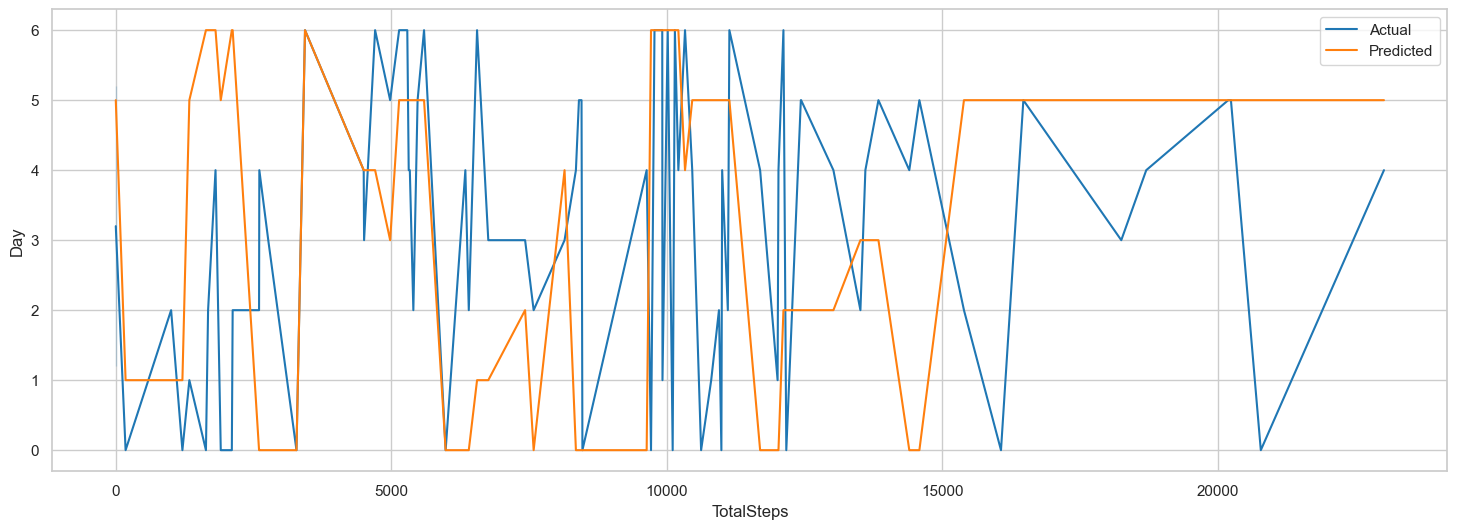

In [226]:
plt.figure(figsize=(18,6),dpi=100)
sns.lineplot(data=new,x='TotalSteps',y='Day',label='Actual')
sns.lineplot(data=new,x='TotalSteps',y='PredictionDay',label='Predicted')
plt.show()